<a href="https://colab.research.google.com/github/JinHeeeKang/Playdata_Python/blob/master/0901.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#군집화   
 
ward 와드를 가장 많이 사용 : 가까운 것끼리 군집하고   
거리제곱합이 적은 것끼리 다시 군집화   
싱글은 가까운것끼리   



In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
X=[[i] for i in [2,8,0,4,1,9,9,0]]
Z=linkage(X,'ward')

In [ ]:
fig=plt.figure(figsize=(25,10))
plt.show()

<Figure size 1800x720 with 0 Axes>

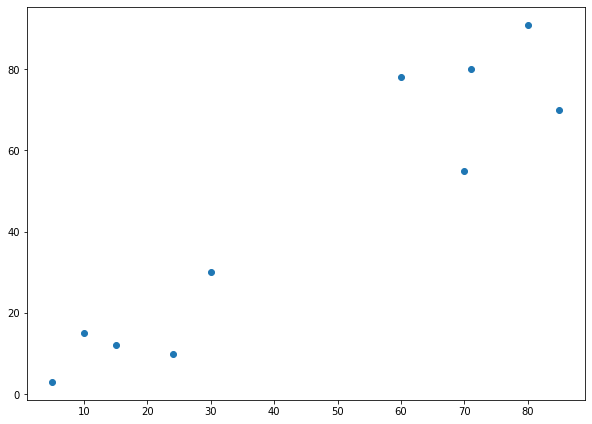

In [ ]:
X=np.array([[5,3],[10,15],[15,12],[24,10],[30,30],
           [85,70],[71,80],[60,78],[70,55],[80,91]])
        
labels=range(1,11)
plt.figure(figsize=(10,7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1])

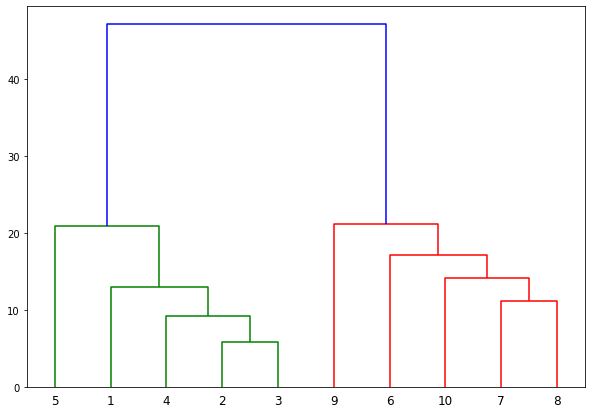

In [ ]:
#길이가 짧을수록 가까운 것
linked=linkage(X,'single')
labelList=range(1,11)
plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',labels=labelList
           ,distance_sort='descending',show_leaf_counts=True)
plt.show()

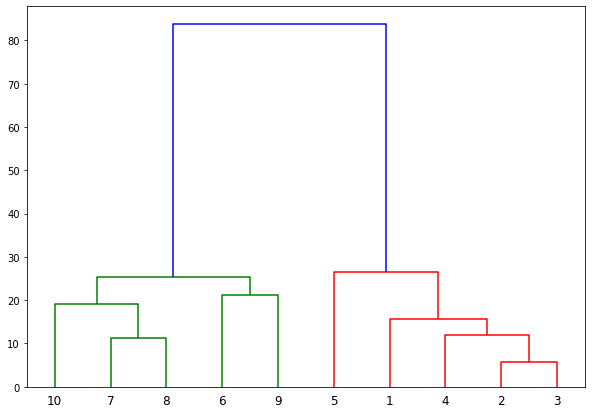

In [ ]:
#평균값
linked=linkage(X,'average')
labelList=range(1,11)
plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',labels=labelList
           ,distance_sort='descending',show_leaf_counts=True)
plt.show()

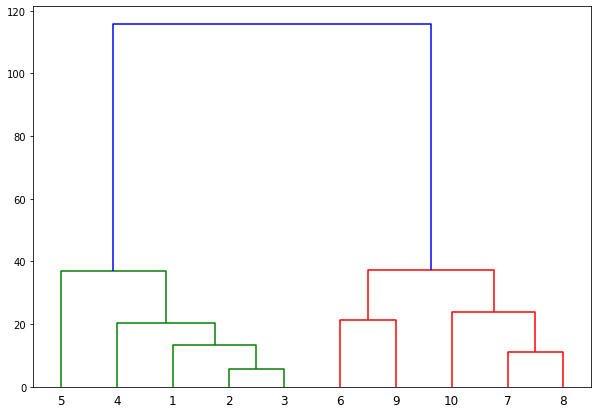

In [ ]:
#max값
linked=linkage(X,'complete')
labelList=range(1,11)
plt.figure(figsize=(10,7))
dendrogram(linked,orientation='top',labels=labelList
           ,distance_sort='descending',show_leaf_counts=True)
plt.show()

In [ ]:
%matplotlib inline

In [ ]:
customer_data=pd.read_csv('/shopping_data.csv')
customer_data.shape

(200, 5)

In [ ]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data=customer_data.iloc[:,3:5].values

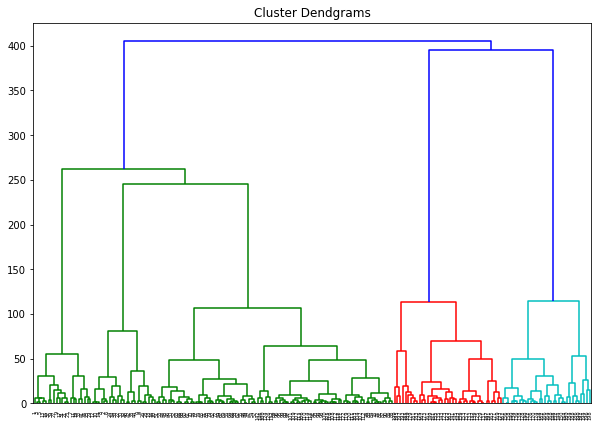

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Cluster Dendgrams")
dend=shc.dendrogram(shc.linkage(data,method='ward'))

In [ ]:
from 

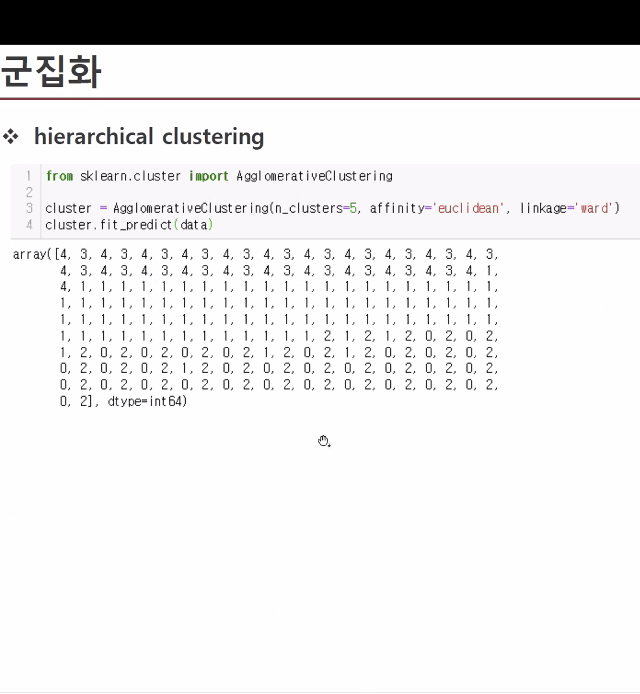

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
X=np.array([[1,2],[2,2],[2,3],[8,7],[8,8],[25,80]])
clustering=DBSCAN(eps=3,min_samples=2).fit(X)
clustering.labels_

array([ 0,  0,  0,  1,  1, -1])

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
X,y=make_blobs(random_state=0,n_samples=12)

dbscan=DBSCAN()
clusters=dbscan.fit_predict(X)
print(clusters)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris=load_iris()
labels=pd.DataFrame(iris.target)
labels.colums=['labels']
data=pd.DataFrame(iris.data)
data.colums=['Sepal length','Sepal width','Petal length','Petal width']
data=pd.concat([data,labels],axis=1)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
import seaborn as sns
model=DBSCAN(min_samples=6)
feature = data[ ['Sepal length','Sepal width','Petal length','Petal width']]
# feature.head()
predict=pd.DataFrame(model.fit_predict(feature))

In [ ]:
import numpy as np
import pandas as pd
data={'x1':[-1.1930,-0.0370,-0.5919,0.3792,1.4427],
      'x2':[-1.0300,-0.7647,-0.3257,1.0739,1.0464],
      'x3':[1.5012,0.3540,-0.0910,-0.7140,-1.0502]}
df=pd.DataFrame(data)
print(df)

       x1      x2      x3
0 -1.1930 -1.0300  1.5012
1 -0.0370 -0.7647  0.3540
2 -0.5919 -0.3257 -0.0910
3  0.3792  1.0739 -0.7140
4  1.4427  1.0464 -1.0502


In [ ]:
df_cov=(np.cov(df.T))
eig_vals,eig_vecs=np.linalg.eig(df_cov)

#covariance
print(df_cov)

[[ 1.00003489  0.84168247 -0.88400976]
 [ 0.84168247  0.99999019 -0.91324874]
 [-0.88400976 -0.91324874  0.99997862]]


In [ ]:
#고유벡터
print(eig_vecs)

[[ 0.5699263   0.77981949  0.25897024]
 [ 0.57649781 -0.60405883  0.55023923]
 [-0.58552054  0.16430003  0.79383323]]


In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
pca.fit(df)

print(pca.n_components_)
print(pca.explained_variance_ratio_)#라티오 구하는게 중요

3
[0.91987228 0.05393469 0.02619302]


In [ ]:
PC1=df.dot(np.reshape(eig_vecs.T[0],(3,1)))
print(PC1)

          0
0 -2.152698
1 -0.669209
2 -0.471822
3  1.253279
4  2.040394


In [ ]:
eig_vals_sum=np.sum(eig_vals)
#variance
for eig_val in eig_vals:
    print(eig_val/eig_vals_sum)

0.9198722829162319
0.05393469393283531
0.026193023150932717


In [ ]:
#스케일러 해주어야 함
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler =StandardScaler()
scaler.fit(cancer.data)
X_scaled=scaler.transform(cancer.data)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)
#**중요
print("원본 데이터 형태:",str(X_scaled.shape))
print("축소된 데이터 형태:",str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


In [ ]:
print(pca.explained_variance_ratio_)#PC1,PC2
#이 데이터 경우 두개의 주성분이 전체 분산의 약 63%를 설명

[0.44272026 0.18971182]


In [ ]:
print("PCA 주성분: ",pca.components_)

PCA 주성분:  [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'pca2')

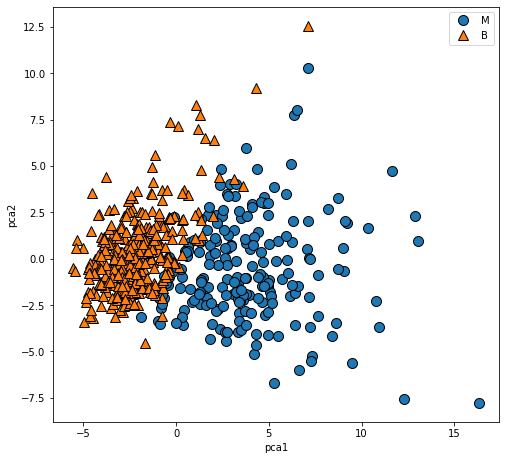

In [ ]:
#고차원 데이터를 2차원에 투영
# !pip install mglearn
import matplotlib.pyplot as plt
import numpy as np
import mglearn

plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(["M","B"],loc="best")
plt.gca().set_aspect("equal")#x,y축 값이 따로 없을때 동등하게 맞춰주기위해
plt.xlabel("pca1")
plt.ylabel("pca2")

Text(0, 0.5, 'pca')

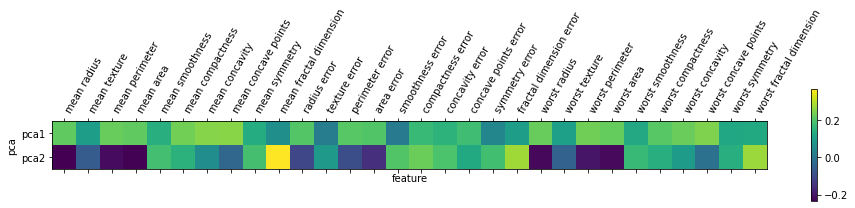

In [ ]:
#교재 p.202
plt.matshow(pca.components_,cmap='viridis')#고유벡터
plt.yticks([0,1],["pca1","pca2"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,
           rotation=60,ha='left')
plt.xlabel("feature")
plt.ylabel("pca")

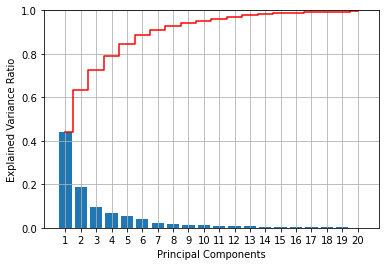

In [ ]:
#70%이상 설명해주면 되니까 4개가 적당
pca=PCA(n_components=20)
pca.fit(X_scaled)

X_pca=pca.transform(X_scaled)
explain_variance_ratio=pca.explained_variance_ratio_

def ratio(explain_variance_ratio):
    x_axis=range(1,len(explain_variance_ratio)+1)
    plt.bar(x_axis,explain_variance_ratio,align='center')
    plt.step(x_axis,np.cumsum(explain_variance_ratio),where='mid',color='red')
    plt.ylim(0,1,1)
    plt.xticks(x_axis)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid()
    plt.show()

ratio(explain_variance_ratio)

In [ ]:
from sklearn.manifold import TSNE
tsne =TSNE(n_components=2,random_state=0)
tsne_obj=tsne.fit_transform(X_scaled)
tsne_df=pd.DataFrame({'x1':tsne_obj[:,0],
                      'x2':tsne_obj[:,1],
                      'classification':cancer.target})

In [ ]:
tsne_df.head()

,x1,x2,classification
0,-26.271820,16.096264,0
1,-12.890461,22.179155,0
2,-22.607653,18.168743,0
3,-27.978006,2.484692,0
4,-15.115546,15.759376,0


In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10)
sns.scatterplot(x1,x2,hue='classification',legend='full',data=tsne_df)
plt.show()

SyntaxError: ignored